In [ ]:
import os
import platform
import sys
import sklearn
import numpy as np
np.random.seed(260393)
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

import warnings 
warnings.filterwarnings('ignore')

print("All packages imported!")
print("python=={}".format(platform.python_version()))
print("seaborn=={}".format(sns.__version__))
print("scikit-learn=={}".format(sklearn.__version__))
print("pandas=={}".format(pd.__version__))
print("numpy=={}".format(np.__version__))
print("matplotlib=={}".format(mp.__version__))

#运行之后你将看到这些结果
# You should see this output:
# All packages imported!
# python==3.7.6
# seaborn==0.11.0
# scikit-learn==0.23.2
# pandas==1.1.4
# numpy==1.19.4
# matplotlib==3.2.2

All packages imported!
python==3.6.9
seaborn==0.11.1
scikit-learn==0.22.2.post1
pandas==1.1.5
numpy==1.19.5
matplotlib==3.2.2


# Q1 Linear regression [House price data]


Use linear regression to predict housing prices in Melbourne, Victoria, Australia and other areas.

Features introduction:
Attribute description:

Suburb: Suburb area
Address: Address
Rooms: Number of bedrooms
Price: Price in Australian dollars
Method: sale method (we won't use this)
Type: h (house), u (apartment), t (townhouse) Type: There are three types: h, u, t
SellerG: Real Estate Agent
Date: Date sold
Distance: Distance from Central Business District in kilometres
Regionname: General Region Administrative divisions
Propertycount: Number of properties that exist in the suburb.
Bedroom2: Scraped # of Bedrooms (from different source) The number of bedrooms (I don’t know what it is, it should be a certain kind of bedroom, and it has nothing to do with the number of rooms.)
Bathroom: Number of Bathrooms
Car: Number of carspots
Landsize: Land Size in Sq. Metres
BuildingArea: Building Size in Sq. Metres
YearBuilt: Year the house was built
CouncilArea: Governing council for the area
Lattitude: Latitude
Longtitude: Longitude

In [ ]:
from google.colab import drive
drive.mount('/content/ddrive')


Mounted at /content/ddrive


1.读入数据并描述它

In [ ]:
#data_path = os.path.join(os.getcwd(), 'datasets', 'Melbourne_housing.csv')
data_path = '/content/ddrive/My Drive/project/data/Melbourne_housing.csv'
aushouse = pd.read_csv(data_path, delimiter = ',')

In [ ]:
aushouse.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.284097,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.313335,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2019.000000,-37.390200,145.526350,21650.000000


In [ ]:
aushouse.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


2.Encode the three values (h, u, t) below the type feature to make them variables that can be used in linear regression.
Make your own judgment and remove the features (such as address) in the data set that cannot be used for regression analysis. In addition, we don't use Method and YearBuilt, delete them.

In [ ]:
aushouse['Type_h'] = np.where(aushouse['Type']=='h', 1, 0)
aushouse['Type_u'] = np.where(aushouse['Type']=='u', 1, 0)
aushouse['Type_t'] = np.where(aushouse['Type']=='t', 1, 0)

In [ ]:
aushouse.drop(['Address', 'Method', 'YearBuilt'], axis=1, inplace=True)

In [ ]:
aushouse.keys()

Index(['Suburb', 'Rooms', 'Type', 'Price', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'Type_h', 'Type_u', 'Type_t'],
      dtype='object')

3.Use the remaining features in step 2 to make a graph of the correlation thermal matrix. (Correlation heatmap, use the heatmap in saeborn)

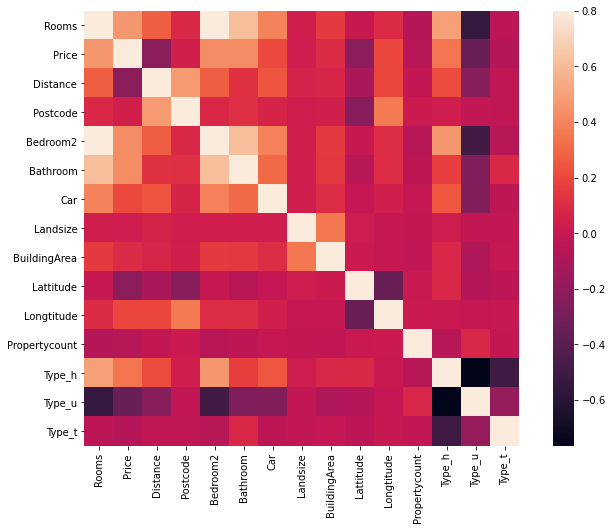

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Type_h,Type_u,Type_t
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,0.004872,0.103235,-0.071677,0.499496,-0.538242,-0.041022
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.215607,0.197874,-0.059017,0.347299,-0.346388,-0.063657
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,-0.100417,0.200946,-0.018140,0.216365,-0.227375,-0.025506
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,-0.231027,0.362895,0.017108,0.036568,-0.019608,-0.029533
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,0.003447,0.106164,-0.053451,0.465965,-0.494167,-0.060566
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,-0.059183,0.106531,-0.032887,0.170653,-0.260269,0.089721
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,-0.009020,0.047213,-0.009617,0.244597,-0.256658,-0.035331
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.025318,-0.002582,-0.018195,0.027337,-0.014852,-0.023793
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.017155,-0.002143,-0.024523,0.079095,-0.085439,-0.009368
Lattitude,0.004872,-0.215607,-0.100417,-0.231027,0.003447,-0.059183,-0.009020,0.025318,0.017155,1.000000,-0.345589,0.011112,0.087641,-0.072675,-0.039875


In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
corrmat = aushouse.corr()
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()
corrmat

4.Observe the correlation diagram between variables drawn in step 3, and select some unimportant features that can be deleted. Delete them, and then clean the remaining data to remove those rows with missing values. The cleaned dataframe is named aushousing.

In [ ]:
aushouse.keys()

Index(['Suburb', 'Rooms', 'Type', 'Price', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'Type_h', 'Type_u', 'Type_t'],
      dtype='object')

In [ ]:
pd.isnull(aushouse[aushouse['Price'].isnull()]).sum()#查看缺省情况

Suburb              0
Rooms               0
Type                0
Price            7610
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         1776
Bathroom         1779
Car              1904
Landsize         2545
BuildingArea     4524
CouncilArea         0
Lattitude        1722
Longtitude       1722
Regionname          0
Propertycount       0
Type_h              0
Type_u              0
Type_t              0
dtype: int64

In [ ]:
aushousing = aushouse.drop(columns=['Suburb','SellerG','Date','CouncilArea','Regionname','Type'], inplace=False)
aushousing.dropna(axis=0, inplace=True)
aushousing

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Type_h,Type_u,Type_t
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,-37.80790,144.99340,4019.0,1,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,-37.80930,144.99440,4019.0,1,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,-37.80720,144.99410,4019.0,1,0,0
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,-37.80240,144.99930,4019.0,1,0,0
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,-37.80600,144.99540,4019.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,3,500000.0,25.5,3750.0,3.0,2.0,2.0,383.0,118.0,-37.61940,145.03951,2940.0,1,0,0
34849,3,570000.0,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,-37.61031,145.03393,2940.0,1,0,0
34853,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,-37.81551,144.88826,6543.0,1,0,0
34854,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,-37.82286,144.87856,6543.0,0,0,1


5.Create independent variable X and dependent variable y from aushousing, and then use train_test_split to create training set and test set. The test set accounts for 20% of the entire data. [Set random_state to 0 to ensure that the test set drawn randomly is the same each time]

In [ ]:
y= aushousing['Price']
y.head()

2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: Price, dtype: float64

In [ ]:
X = aushousing.drop(['Price'],axis=1)
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Type_h,Type_u,Type_t
2,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,4019.0,1,0,0
4,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,4019.0,1,0,0
6,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,4019.0,1,0,0
11,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,4019.0,1,0,0
14,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,4019.0,1,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

6.Perform linear regression on the training set and print out its intercept in one sentence. Use a dataframe to show the parameter estimates of different features.

In [ ]:
x_train.shape

(7388, 14)

In [ ]:
y_train.shape

(7388,)

In [ ]:
LinearReg = LinearRegression()
model = LinearReg.fit(x_train, y_train)

In [ ]:
score=model.score(x_train,y_train)
print(score)

0.5609863274106273


In [ ]:
score_test=model.score(x_test,y_test)
print(score_test)

0.555461469672412


In [ ]:
LinearReg.intercept_ 

-159590843.63931504

In [ ]:
pd.DataFrame(LinearReg.coef_)

,0
0,1.513346e+05
1,-5.266823e+04
2,9.622397e+02
3,3.414045e+04
4,2.100808e+05
5,5.156332e+04
6,3.264667e+01
7,3.016297e+01
8,-1.461733e+06
9,7.023361e+05


7.Get it, and print the root mean square error (RMSE) and the harmonic coefficient R^2 in one sentence.

In [ ]:
print(mean_squared_error(y_train, model.predict(x_train)))

194072273121.90463


In [ ]:
print(mean_squared_error(y_test, model.predict(x_test)))

240217280311.43063


In [ ]:
print(r2_score(y_train, model.predict(x_train)))

0.5609863274106273


In [ ]:
print(r2_score(y_test, model.predict(x_test)))

0.555461469672412


# Q2 Naive Bayes classifier [Income data]
The purpose of this task is to predict whether an American’s income exceeds $50,000.

attribute：

age: age in years
work: working status
fnlwgt: weighting factor 
edu: education level 
edunum: years of education 
marit: marital-status 
occ: occupation 
rel: relationship status 
race: race. 
sex: sex 
cg: capital-gains 
cl: capital-losses 
hours: hours of work per week 
nat: national origin 
over50k: income over $50,000 

[Code] Read in the income data (income.csv) and name it income. Remove attributes we won't use (in italics in the list above, i.e _age, fnlwgt, edunum, cg, cl, hours_), and remove instances with missing data.
[Code] Use a library function to show the attributes, their type, and how many there are of each.
[Code] We'll use the integer attribute as the class to predict. How many classes are there, and what integer values to they have?
[Code] Use another library function to show details about each of the other attributes (the features), including the frequency of the most prevalent category.

In [ ]:
data_path = '/content/ddrive/My Drive/project/data/income.csv'
income = pd.read_csv(data_path, delimiter = ',')

In [ ]:
income

,age,work,fnlwgt,edu,edunum,marital,occ,rel,race,sex,cg,cl,hours,nat,over50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
income.drop(['age', 'fnlwgt', 'edunum', 'cg', 'cl', 'hours'], axis=1, inplace=True)

In [ ]:
pd.isnull(income.isnull()).sum()

work       0
edu        0
marital    0
occ        0
rel        0
race       0
sex        0
nat        0
over50k    0
dtype: int64

In [ ]:
income.dropna(axis=0, inplace=True)

In [ ]:
income

,work,edu,marital,occ,rel,race,sex,nat,over50k
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0


In [ ]:
#Display attributes, attribute types, number of attributes
income.columns

Index(['work', 'edu', 'marital', 'occ', 'rel', 'race', 'sex', 'nat',
       'over50k'],
      dtype='object')

In [ ]:
income.dtypes

work       object
edu        object
marital    object
occ        object
rel        object
race       object
sex        object
nat        object
over50k     int64
dtype: object

In [ ]:
pd.isnull(income.isnull()).sum()#Each attribute is not empty, so the number is 32561

work       0
edu        0
marital    0
occ        0
rel        0
race       0
sex        0
nat        0
over50k    0
dtype: int64

In [ ]:
#After grouping, it can be seen that there are two types of over50k, 0 has 24720, 1 has 7841
grouped = income.groupby('over50k')
print(grouped.size())

over50k
0    24720
1     7841
dtype: int64


In [ ]:
income.keys()

Index(['work', 'edu', 'marital', 'occ', 'rel', 'race', 'sex', 'nat',
       'over50k'],
      dtype='object')

In [ ]:
#work information
print(income.work.value_counts())
print(income.work.unique())
print("frequency:", income.work.value_counts()[0]/income.shape[0])

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: work, dtype: int64
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
frequency: 0.6970301894904948


In [ ]:
#edu information
print(income.edu.value_counts())
print(income.edu.unique())
print("frequency:", income.edu.value_counts()[0]/income.shape[0])

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: edu, dtype: int64
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
frequency: 0.32250238014802984


In [ ]:
#marital information
print(income.marital.value_counts())
print(income.marital.unique())
print("frequency:", income.marital.value_counts()[0]/income.shape[0])

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital, dtype: int64
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
frequency: 0.4599367341297872


In [ ]:
#occ information
print(income.occ.value_counts())
print(income.occ.unique())
print("frequency:", income.occ.value_counts()[0]/income.shape[0])

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occ, dtype: int64
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
frequency: 0.12714597217530174


In [ ]:
#rel information
print(income.rel.value_counts())
print(income.rel.unique())
print("frequency:", income.rel.value_counts()[0]/income.shape[0])

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: rel, dtype: int64
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
frequency: 0.40517797364945796


In [ ]:
#race information
print(income.race.value_counts())
print(income.race.unique())
print("frequency:", income.race.value_counts()[0]/income.shape[0])

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
frequency: 0.8542735173981143


In [ ]:
#sex information
print(income.sex.value_counts())
print(income.sex.unique())
print("frequency:", income.sex.value_counts()[0]/income.shape[0])

Male      21790
Female    10771
Name: sex, dtype: int64
['Male' 'Female']
frequency: 0.6692054912318418


In [ ]:
#nat information
print(income.nat.value_counts())
print(income.nat.unique())
print("frequency:", income.nat.value_counts()[0]/income.shape[0])

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

[Code] List the feature names.
[Code] Use seaborn functions to show a bar chart for each of the features of the number of instances with each attribute value, with distinct counts for each target class shown side by side.

In [ ]:
#work
income.work.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
counts = income.work.value_counts()

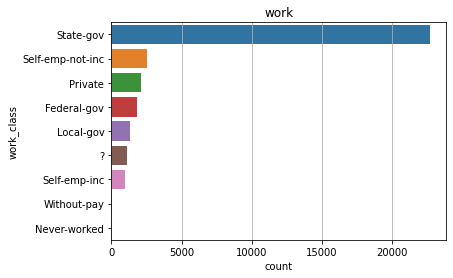

In [ ]:
name_list = ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('work_class')
plt.title('work')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

In [ ]:
#edu
income.edu.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [ ]:
counts = income.edu.value_counts()

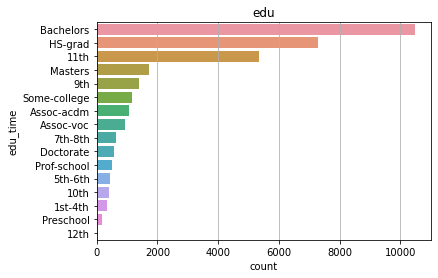

In [ ]:
name_list = ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('edu_time')
plt.title('edu')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

In [ ]:
#marital
income.marital.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
counts = income.marital.value_counts()

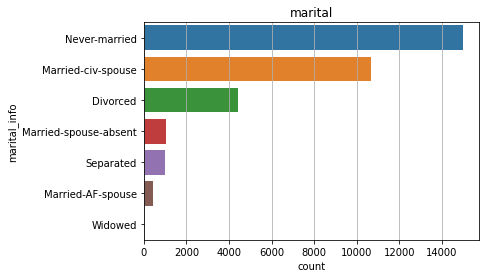

In [ ]:
name_list = ['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed']
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('marital_info')
plt.title('marital')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

In [ ]:
#occ
income.occ.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
counts = income.occ.value_counts()

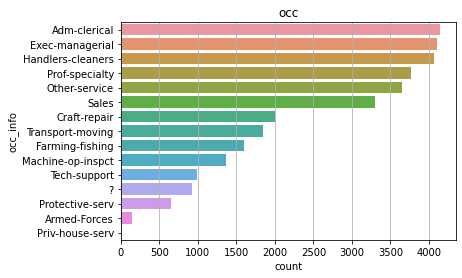

In [ ]:
name_list = ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv']
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('occ_info')
plt.title('occ')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

In [ ]:
#rel
income.rel.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [ ]:
counts = income.rel.value_counts()

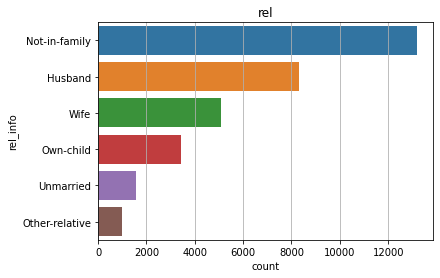

In [ ]:
name_list = ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative']
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('rel_info')
plt.title('rel')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

In [ ]:
#race
income.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [ ]:
counts = income.race.value_counts()

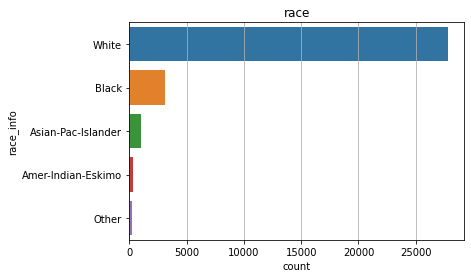

In [ ]:
name_list = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other']
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('race_info')
plt.title('race')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

In [ ]:
#sex
income.sex.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
counts = income.sex.value_counts()

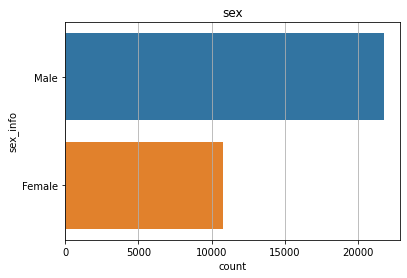

In [ ]:
name_list = ['Male', 'Female']
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('sex_info')
plt.title('sex')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

In [ ]:
#nat
income.nat.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
counts = income.nat.value_counts()

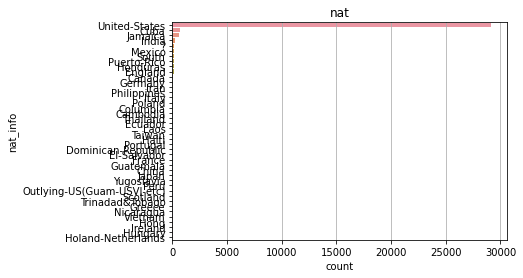

In [ ]:
name_list = ['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands']
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('nat_info')
plt.title('nat')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

In [ ]:
#over50k
income.over50k.unique()

array([0, 1])

In [ ]:
counts = income.over50k.value_counts()

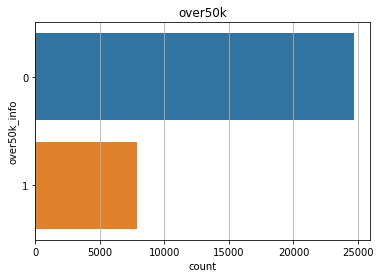

In [ ]:
name_list = [0, 1]
count_list = [counts[i] for i in range(len(name_list))]

plt.grid()
plt.xlabel('count')
plt.ylabel('over50k_info')
plt.title('over50k')
sns.barplot(x=count_list, y=name_list, ci=68, orient="h")
plt.show()

[Code] Set target_encoded to be the array of class values, and show some the values for some of the instances.
[Code] Use OrdinalEncoder to transform the categorical feature values to numeric values
[Code] Store the encodings in a data frame called income_encoded. Show the feature values for some of the instances.

In [ ]:
target_encoded = np.array(income['over50k'])
target_encoded[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
#OrdinalEncoder encode
enc = OrdinalEncoder()
income[['work', 'edu', 'marital', 'occ', 'rel', 'race', 'sex', 'nat',
       'over50k']] = enc.fit_transform(income[['work', 'edu', 'marital', 'occ', 'rel', 'race', 'sex', 'nat',
       'over50k']])

In [ ]:
income_encoded = income
income_encoded[:10]

,work,edu,marital,occ,rel,race,sex,nat,over50k
0,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0
5,4.0,12.0,2.0,4.0,5.0,4.0,0.0,39.0,0.0
6,4.0,6.0,3.0,8.0,1.0,2.0,0.0,23.0,0.0
7,6.0,11.0,2.0,4.0,0.0,4.0,1.0,39.0,1.0
8,4.0,12.0,4.0,10.0,1.0,4.0,0.0,39.0,1.0
9,4.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,1.0


[Code] Set X to be the data frame of independent variables, and y the array of dependent variables. Split the data into training and test sets using test_train_split, with a testing fraction of 20%, and setting the random state to zero for consistency.
[Code] A simple baseline for classification tasks is to always predict the most common class. Create an array of predictions according to this baseline, and show the following performance statistics: number of missclassified instances, accuracy, F1, precision, recall.
[Code] Creat a confusion matrix and display it as an annotated heatmap (use sns_heatmap).

In [ ]:
X = income_encoded.drop(['over50k'], axis=1)
y = target_encoded
(trainX, testX, trainY, testY) = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
trainX

,work,edu,marital,occ,rel,race,sex,nat
15282,4.0,1.0,0.0,14.0,1.0,4.0,1.0,39.0
24870,4.0,11.0,4.0,4.0,1.0,4.0,0.0,39.0
18822,4.0,9.0,4.0,1.0,1.0,4.0,0.0,39.0
26404,4.0,11.0,2.0,12.0,5.0,2.0,0.0,39.0
7842,6.0,8.0,2.0,10.0,0.0,4.0,1.0,39.0
...,...,...,...,...,...,...,...,...
13123,2.0,12.0,2.0,4.0,0.0,4.0,1.0,39.0
19648,4.0,0.0,4.0,5.0,4.0,4.0,1.0,39.0
9845,4.0,15.0,5.0,12.0,3.0,4.0,0.0,39.0
10799,2.0,10.0,2.0,4.0,0.0,4.0,1.0,39.0


In [ ]:
trainY

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#an array of predictions
pred = np.zeros(trainY.shape)

In [ ]:
pred.shape[0]

26048

In [ ]:
#number of missclassified instances
num=0
for i in range(pred.shape[0]):
  if pred[i]!=trainY[i]:
    num += 1
print('number of missclassified instances:', num)


number of missclassified instances: 6246


In [ ]:
#accuracy, F1, precision, recall
print(accuracy_score(trainY, pred))
print(precision_score(trainY, pred))
print(recall_score(trainY, pred))
print(f1_score(trainY, pred))

0.7602119164619164
0.0
0.0
0.0


In [ ]:
#confusion matrix
conmat_normalised = confusion_matrix(trainY, pred, normalize='true')
conmat_normalised

array([[1., 0.],
       [1., 0.]])

Text(30.5, 0.5, 'true')

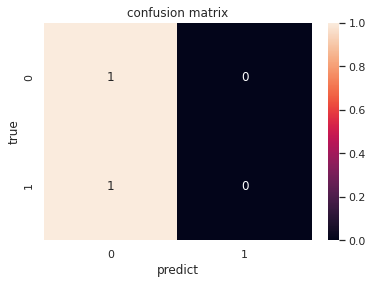

In [ ]:
# Draw a confusion matrix based on the true label and the predicted label
sns.set()
f,ax=plt.subplots()
sns.heatmap(conmat_normalised, annot=True, ax=ax) #Draw a heat map
ax.set_title('confusion matrix') #title
ax.set_xlabel('predict') #x axis
ax.set_ylabel('true') #y axis


[Code] Train a categorical Naive Bayes classifier on the training data you made.
[Code] Report the classifier's accuracy, precision and recall and F1 on the training dataset. Also report the confusion matrix and the normalised confusion matrix for the result.

In [ ]:
#Train naive_bayes model
model = CategoricalNB()
model.fit(trainX, trainY)
predictions = model.predict(trainX) 

In [ ]:
#accuracy, precision and recall and F1
accuracy_score(trainY, predictions)

0.7948402948402948

In [ ]:
precision_score(trainY, predictions)

0.5541286605856938

In [ ]:
recall_score(trainY, predictions)

0.739193083573487

In [ ]:
f1_score(trainY, predictions)

0.6334202222527097

In [ ]:
# confusion matrix and the normalised confusion matrix
conmat = confusion_matrix(trainY, predictions)
conmat

array([[16087,  3715],
       [ 1629,  4617]])

In [ ]:
conmat_normalised = confusion_matrix(trainY, predictions, normalize='true')
conmat_normalised

array([[0.81239269, 0.18760731],
       [0.26080692, 0.73919308]])

Text(30.5, 0.5, 'true')

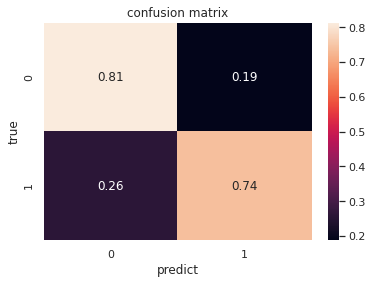

In [ ]:

sns.set()
f,ax=plt.subplots()
sns.heatmap(conmat_normalised, annot=True, ax=ax)
ax.set_title('confusion matrix') 
ax.set_xlabel('predict')
ax.set_ylabel('true') 


[Code] Now evaluate the classifier on the testing data you made. Report the classifier's accuracy, precision and recall and F1 on the testing dataset. Also report the confusion matrix and the normalised confusion matrix for the result.

In [ ]:
predictions_test = model.predict(testX)

In [ ]:
#accuracy, precision and recall and F1
accuracy_score(testY, predictions_test)

0.7855059112544143

In [ ]:
precision_score(testY, predictions_test)

0.5466981132075471

In [ ]:
recall_score(testY, predictions_test)

0.7266457680250784

In [ ]:
f1_score(testY, predictions_test)

0.6239569313593539

In [ ]:
# confusion matrix and the normalised confusion matrix
conmat = confusion_matrix(testY, predictions_test)
conmat

array([[3957,  961],
       [ 436, 1159]])

In [ ]:
conmat_normalised = confusion_matrix(testY, predictions_test, normalize='true')
conmat_normalised

array([[0.80459536, 0.19540464],
       [0.27335423, 0.72664577]])

Text(30.5, 0.5, 'true')

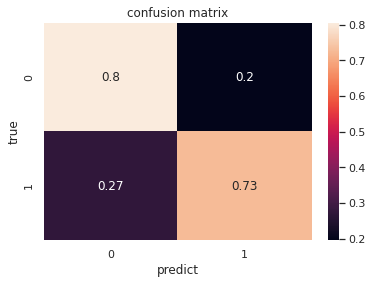

In [ ]:

sns.set()
f,ax=plt.subplots()
sns.heatmap(conmat_normalised, annot=True, ax=ax) 
ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true') 
